In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pprint import pprint

In [ ]:
import sys
from os import getcwd
from pathlib import Path

sys.path.append(str(Path(getcwd()).parent.parent.absolute()))

In [ ]:
from utils.datasets import load_cervical_cancer

df = load_cervical_cancer()
pprint(list(df.columns.values))
df.head()

['Age',
 'Number of sexual partners',
 'First sexual intercourse',
 'Num of pregnancies',
 'Smokes',
 'Smokes (years)',
 'Smokes (packs/year)',
 'Hormonal Contraceptives',
 'Hormonal Contraceptives (years)',
 'IUD',
 'IUD (years)',
 'STDs',
 'STDs (number)',
 'STDs:condylomatosis',
 'STDs:cervical condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:AIDS',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV',
 'STDs: Number of diagnosis',
 'STDs: Time since first diagnosis',
 'STDs: Time since last diagnosis',
 'Dx:Cancer',
 'Dx:CIN',
 'Dx:HPV',
 'Dx',
 'Hinselmann',
 'Schiller',
 'Citology',
 'Biopsy']


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


/tmp/ipykernel_45217/2743519572.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df.replace('?', '-1', inplace=True)


<Axes: >

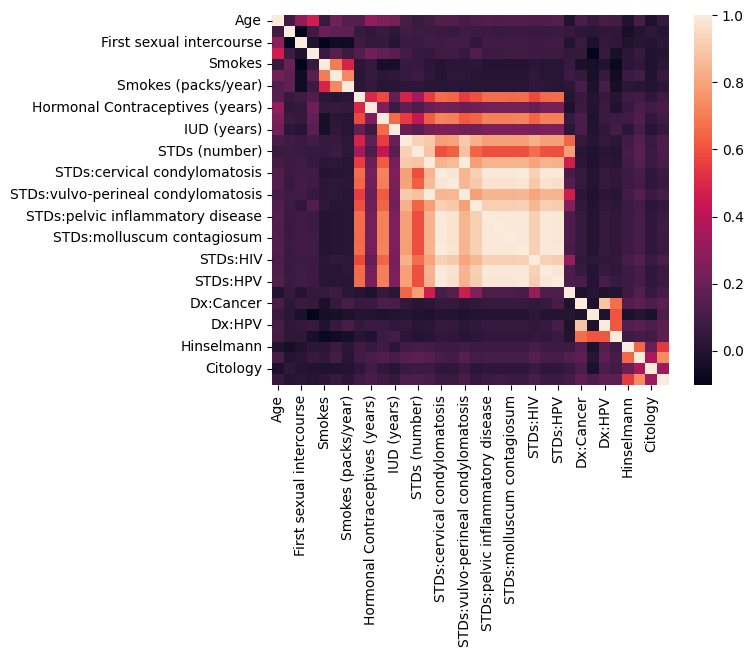

In [ ]:
excluded_cols_name = ['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']
excluded_cols = [col for col in df.columns if col not in excluded_cols_name]
reduced_df = df[excluded_cols]
reduced_df.replace('?', '-1', inplace=True)
correlation = reduced_df.corr()
sns.heatmap(correlation)

<Axes: >

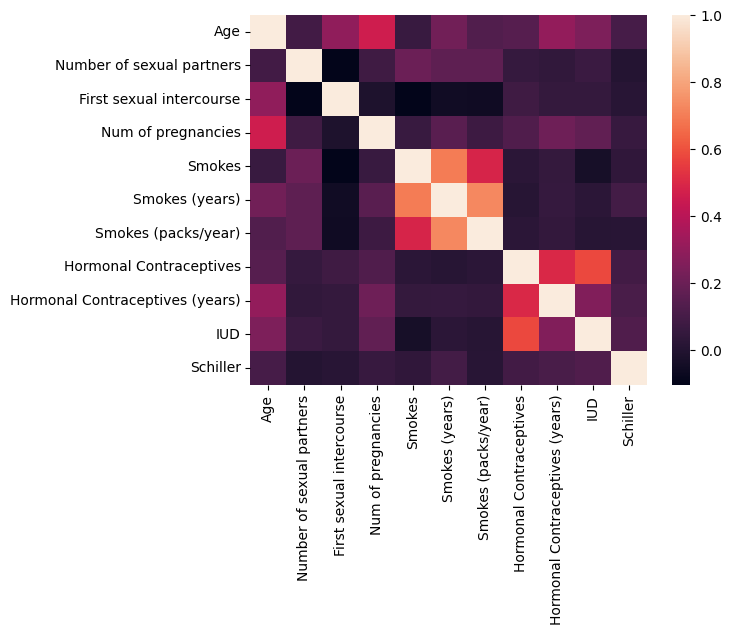

In [13]:
smol = list(reduced_df.columns[:10]) + ['Schiller']
smol_cor = reduced_df[smol].corr()
sns.heatmap(smol_cor)

In [20]:
reduced_df.groupby('Schiller').describe()

Age                                                       \
          count       mean        std   min    25%   50%   75%   max   
Schiller                                                               
0         784.0  26.551020   8.179809  13.0  20.00  25.0  31.0  79.0   
1          74.0  29.675676  11.003247  16.0  21.25  28.0  35.0  84.0   

         STDs: Number of diagnosis            ... Citology      Biopsy  \
                             count      mean  ...      75%  max  count   
Schiller                                      ...                        
0                            784.0  0.075255  ...      0.0  1.0  784.0   
1                             74.0  0.216216  ...      1.0  1.0   74.0   

                                                       
              mean       std  min  25%  50%  75%  max  
Schiller                                               
0         0.008929  0.094128  0.0  0.0  0.0  0.0  1.0  
1         0.648649  0.480651  0.0  0.0  1.0  1.0  1.0  

[2 rows x 72 columns]